**<font  size=7>策略回測結果報告</font>**

In [3]:
# %%
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import datetime
from interval3 import Interval, IntervalSet
from tqdm import tqdm
from importlib import reload
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import os

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\chiehlinchen\Desktop\msj.ttf',size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'


In [138]:
# %%
today = datetime.datetime.now().strftime("%Y%m%d")


# %%
class get_df:

    def __init__(self):
        self.DB_infos = {"X01" : ("192.168.1.16", "X01", "cm23357868", "86875332")}
        self.querys = {}
        self.db = str()
        self.df_dict =  dict()
        self.w_code_dict = dict()
        self.point_dict = dict()
        self.result_dict = dict()
        
    def db_connect(self, DB_info):
        DB_Host, DB_Name, DB_User, DB_Password = self.DB_infos[DB_info]
        print("Connecting to database using pyodbc...")
        self.db = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; SERVER=' + DB_Host + '; DATABASE=' + DB_Name + '; UID=' + DB_User + '; PWD=' + DB_Password)
        print("Succesfully Connected to database using pyodbc!")
      
    def load_data(self, query):
        df =  pd.read_sql(self.querys[query], self.db)
        return df
    


    staticmethod
    def make_vix():
        df ="""SELECT [日期]
                        ,[收盤價]
                  FROM [X01].[dbo].[日台指選擇權波動率指數(收盤價)]"""+ "where 日期 >= '20191231' and 日期 <= '20211231' order by 日期 "
        return df

In [139]:
#獲取數據
Sql_Base = get_df()
Sql_Base.db_connect('X01')

Connecting to database using pyodbc...
Succesfully Connected to database using pyodbc!


In [179]:
Sql_Base.querys['日台指選擇權波動率指數(收盤價)'] = get_df.make_vix()
df_vix = Sql_Base.load_data('日台指選擇權波動率指數(收盤價)')
df_vix['日期new'] = df_vix['日期'].shift(-1)
df_vix = df_vix.drop(columns='日期').rename(columns={'日期new':'日期'}).set_index('日期').reset_index(drop = False).dropna()
df_vix25 = df_vix[df_vix['收盤價']>=25]

**<font  size=6>固定每日五檔</font>**

**<font  size=5>每日股票池檔數</font>**

In [143]:
pool_long = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_多_檔數.csv',index_col= 0)
pool_short = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_空_檔數.csv',index_col= 0)

In [130]:
pool_long

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [131]:
pool_short

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


**<font  size=5>開盤漲1%進場(每日五檔)(VIX25)</font>**

**<font  size=4>9%停利3%停損</font>**

In [153]:
transactions = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場9%停利3%停損.csv")
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)

**<font  size=4>多單發訊檔數</font>**

In [152]:
pd.DataFrame(returns[returns['date'].isin(df_vix25['日期'])].groupby('date')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

date,20200303,20200310,20200311,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200507,20200508,20200511,20200514,20200515,20200518,20200519,20200520,20200525,20200526,20200615,20200616,20200729,20200730,20200731,20200803,20200804,20200807,20200821,20201102,20201103,20201104,20210126,20210127,20210129,20210201,20210202,20210203,20210302,20210303,20210305,20210308,20210512,20210513,20210514,20210517,20210518,20210519,20210520,20210521,20210524,20210525,20210526,20210823,20211005,20211007,20211013
多單發訊檔數,4,5,2,2,5,4,5,2,5,2,4,4,4,5,3,4,3,3,5,5,5,5,2,5,5,2,4,4,2,4,3,3,5,4,4,5,5,3,3,3,1,5,1,2,3,3,3,5,4,2,4,5,3,3,3,2,2,5,4,4,3,3,4,2,3,5,3,2,3,4,2,5,4,3,5,5,4,4,2,3,5,4,5,5,4,5


**<font  size=4>空單發訊檔數</font>**

In [156]:
pd.DataFrame(returns[~(returns['date'].isin(df_vix25['日期']))].groupby('date')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).T

date,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200305,20200306,20200309,20200521,20200522,20200527,20200528,20200529,20200601,20200602,20200603,20200604,20200605,20200608,20200609,20200611,20200612,20200617,20200618,20200619,20200622,20200623,20200624,20200629,20200630,20200701,20200702,20200703,20200706,20200707,20200708,20200709,20200710,20200713,20200714,20200715,20200716,20200717,20200720,20200721,20200722,...,20210906,20210907,20210908,20210909,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211006,20211008,20211012,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
空單發訊檔數,2,2,3,5,3,2,4,4,4,4,1,2,3,4,4,4,1,4,3,5,5,4,5,4,4,4,5,3,3,5,4,5,1,3,4,4,3,3,4,3,2,2,4,4,4,2,3,2,1,2,4,2,5,3,1,2,1,2,2,4,3,2,1,1,3,4,2,2,2,3,5,1,2,2,4,...,2,2,4,4,2,4,3,5,5,5,3,5,4,5,1,3,3,1,2,4,4,5,3,3,3,4,3,5,5,5,2,5,4,4,4,3,5,5,2,5,4,4,4,5,4,3,3,2,3,3,3,5,4,5,3,5,2,2,4,5,4,4,4,1,4,4,2,2,4,3,4,3,3,2,4


In [132]:

returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435

In [110]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

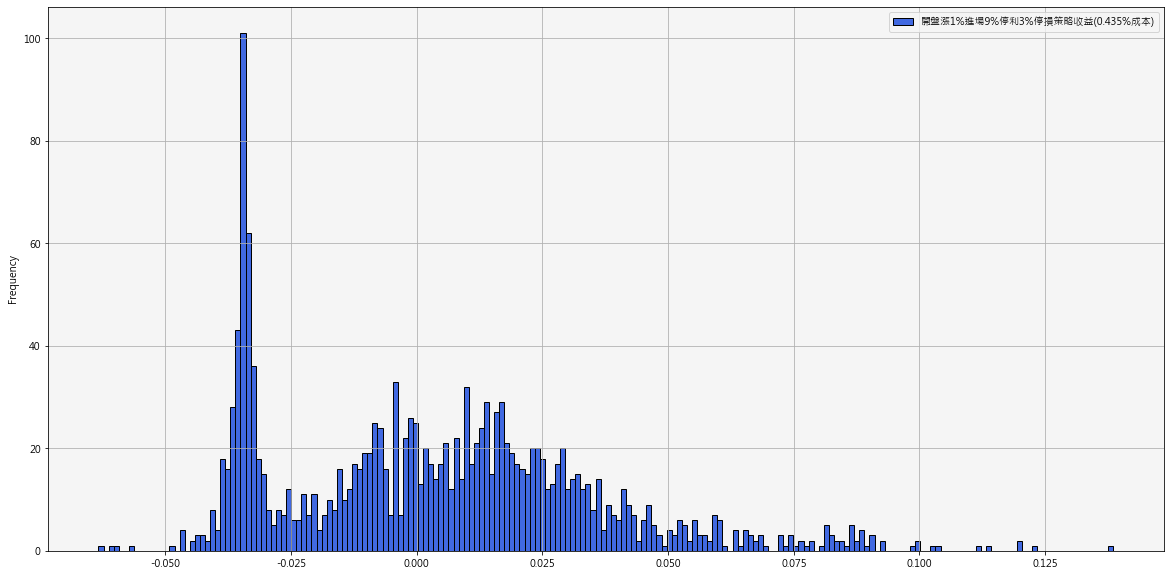

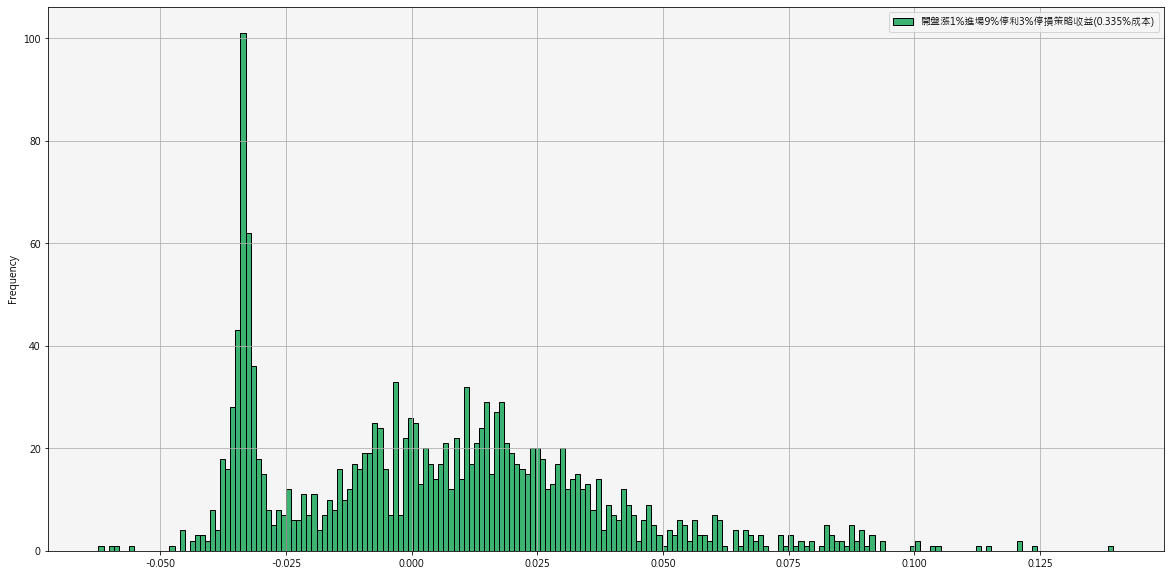

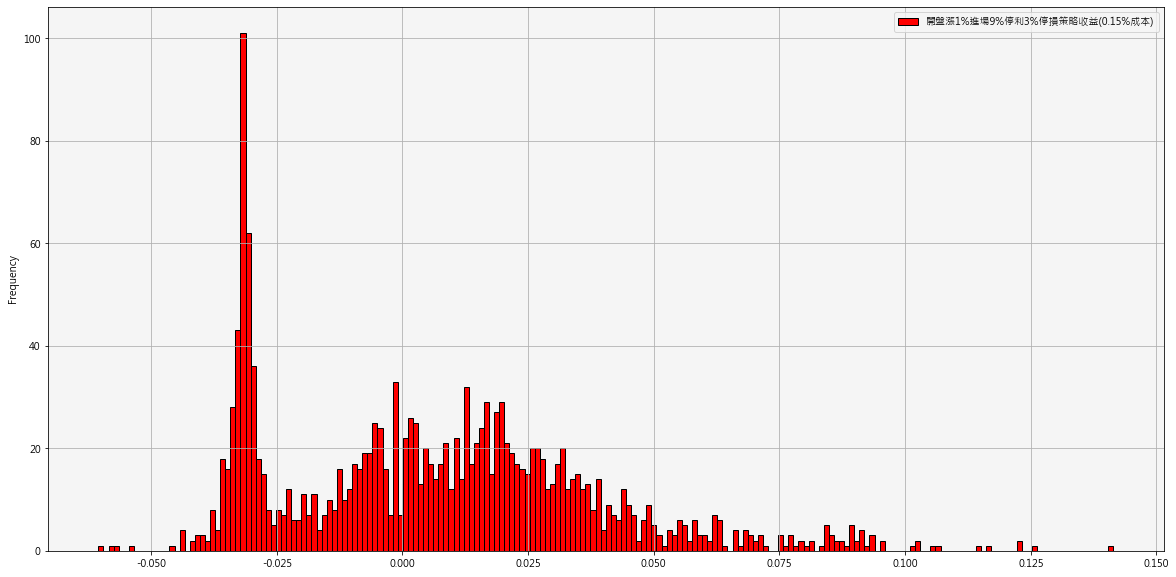

In [112]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [113]:
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.003457,0.004457,0.006307
std,0.031438,0.031438,0.031438
min,-0.063332,-0.062332,-0.060482
25%,-0.025570,-0.024570,-0.022720
50%,0.002379,0.003379,0.005229
75%,0.022680,0.023680,0.025530
max,0.138507,0.139507,0.141357


<AxesSubplot: ylabel='Frequency'>

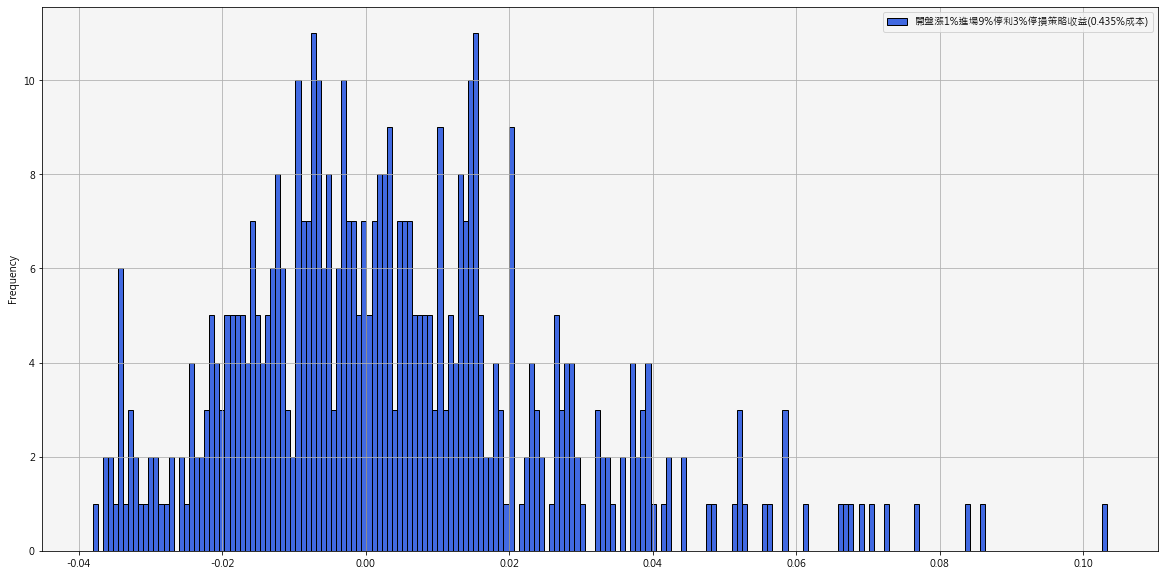

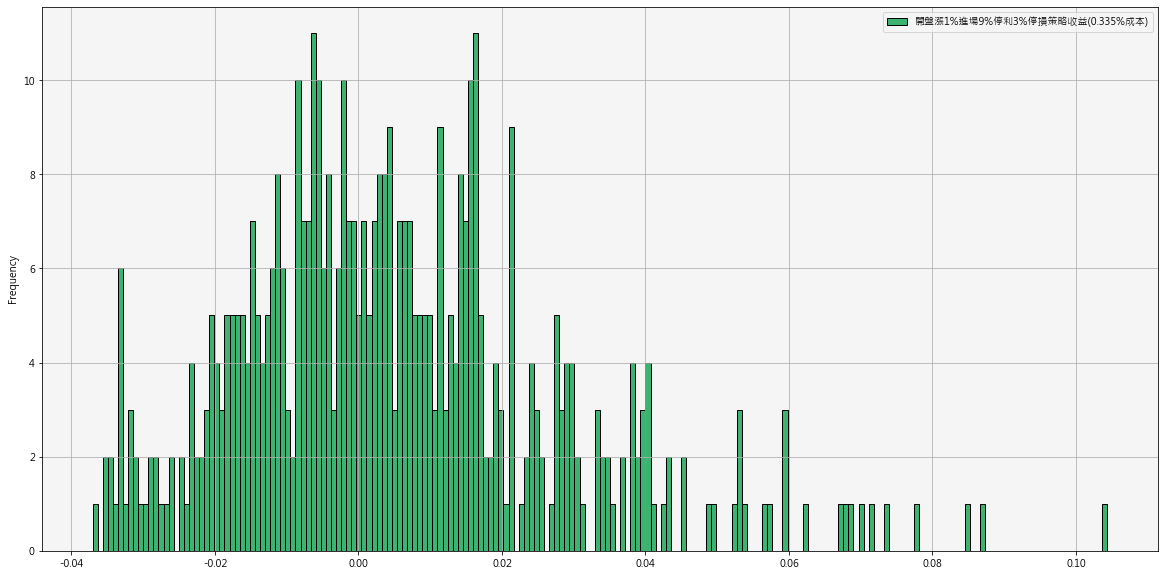

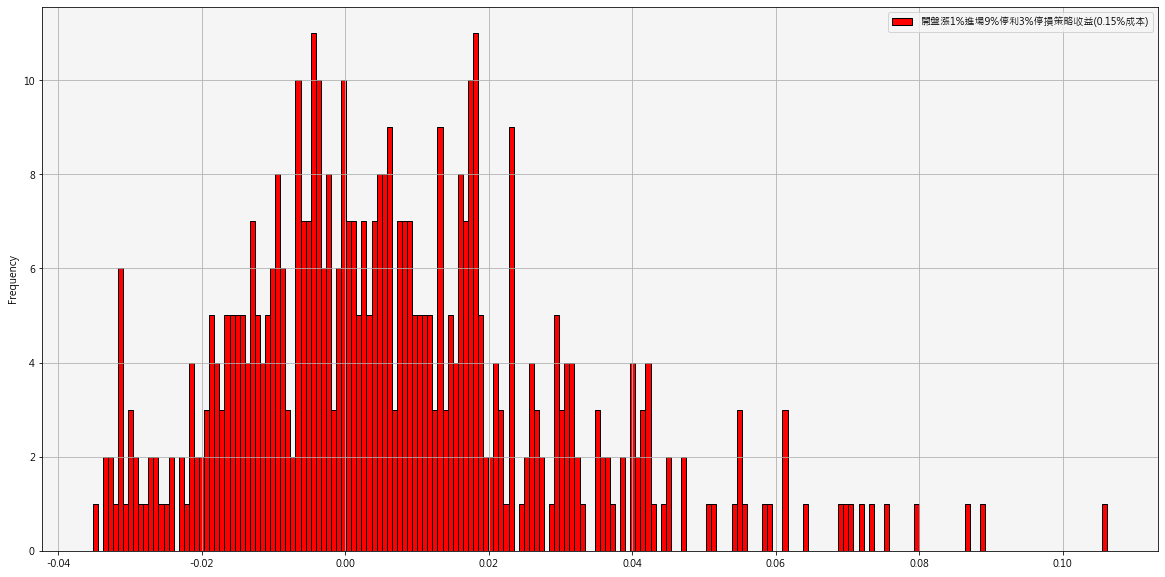

In [114]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [115]:
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.004075,0.005075,0.006925
std,0.022281,0.022281,0.022281
min,-0.038065,-0.037065,-0.035215
25%,-0.010598,-0.009598,-0.007748
50%,0.001519,0.002519,0.004369
75%,0.015026,0.016026,0.017876
max,0.103342,0.104342,0.106192


<AxesSubplot: xlabel='日期'>

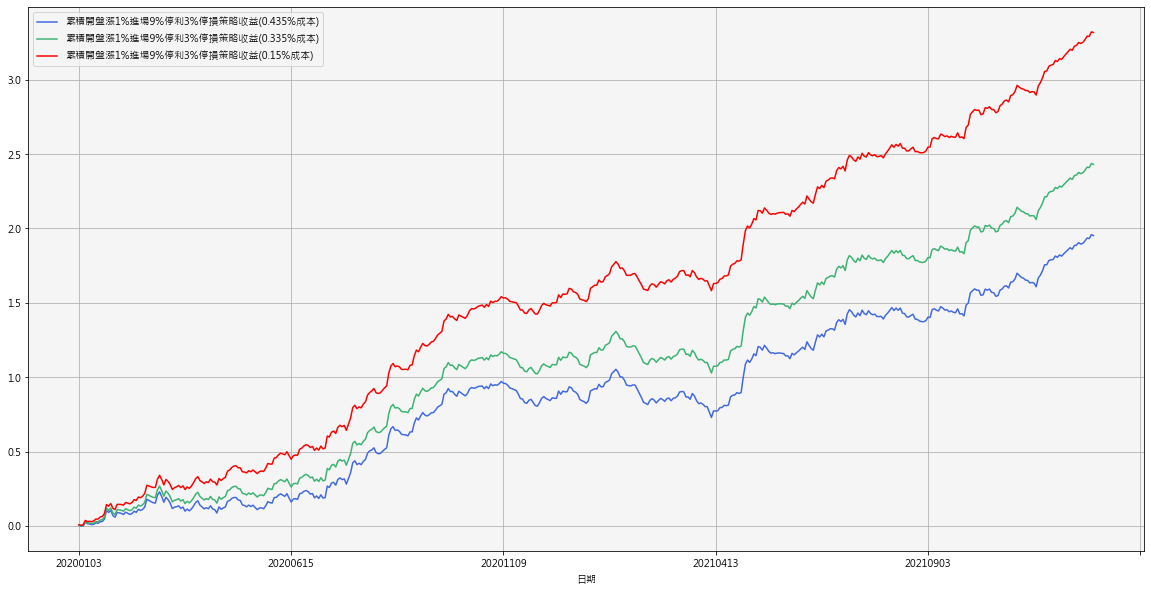

In [116]:
returns_day[['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=4>3%停利1%停損</font>**

In [166]:
transactions_short = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場3%停利1%停損_空.csv")
transactions_long = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場3%停利1%停損_多.csv")
transactions = pd.concat([transactions_short,transactions_long])
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)

**<font  size=4>多單發訊檔數</font>**

In [169]:
pd.DataFrame(returns[returns['date'].isin(df_vix25['日期'])].groupby('date')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

date,20200303,20200310,20200311,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200507,20200508,20200511,20200514,20200515,20200518,20200519,20200520,20200525,20200526,20200615,20200616,20200729,20200730,20200731,20200803,20200804,20200807,20200821,20201102,20201103,20201104,20210126,20210127,20210129,20210201,20210202,20210203,20210302,20210303,20210305,20210308,20210512,20210513,20210514,20210517,20210518,20210519,20210520,20210521,20210524,20210525,20210526,20210823,20211005,20211007,20211013
多單發訊檔數,4,5,2,2,5,4,5,2,5,2,5,5,4,5,3,4,3,3,5,5,5,5,2,5,4,2,4,4,2,4,3,3,4,4,4,5,5,3,3,3,1,5,2,2,3,3,3,5,4,2,4,5,3,3,3,2,2,5,4,4,3,3,4,2,3,5,3,2,3,4,2,5,4,3,5,5,4,4,2,3,4,4,4,5,4,4


In [170]:
pd.DataFrame(returns[~(returns['date'].isin(df_vix25['日期']))].groupby('date')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).T

date,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200305,20200306,20200309,20200521,20200522,20200527,20200528,20200529,20200601,20200602,20200603,20200604,20200605,20200608,20200609,20200611,20200612,20200617,20200618,20200619,20200622,20200623,20200624,20200629,20200630,20200701,20200702,20200703,20200706,20200707,20200708,20200709,20200710,20200713,20200714,20200715,20200716,20200717,20200720,20200721,20200722,...,20210906,20210907,20210908,20210909,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211006,20211008,20211012,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
空單發訊檔數,2,2,3,5,3,2,4,4,4,4,1,2,3,4,4,4,1,4,3,5,5,4,5,4,4,4,5,3,3,5,4,5,1,3,4,4,3,3,4,3,2,2,4,4,4,2,3,2,1,2,4,2,5,3,1,2,1,2,2,4,3,2,1,1,3,4,2,2,2,3,5,1,2,2,4,...,2,2,4,4,2,4,3,5,5,5,3,5,4,5,1,3,3,1,2,4,4,5,3,3,3,4,3,5,5,5,2,5,4,4,4,3,5,5,2,5,4,4,4,5,4,3,3,2,3,3,3,5,4,5,3,5,2,2,4,5,4,4,4,1,4,4,2,2,4,3,4,3,3,2,4


In [171]:
returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場3%停利1%停損策略收益(不加成本)'})
returns['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00435

In [173]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場3%停利1%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場3%停利1%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場3%停利1%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

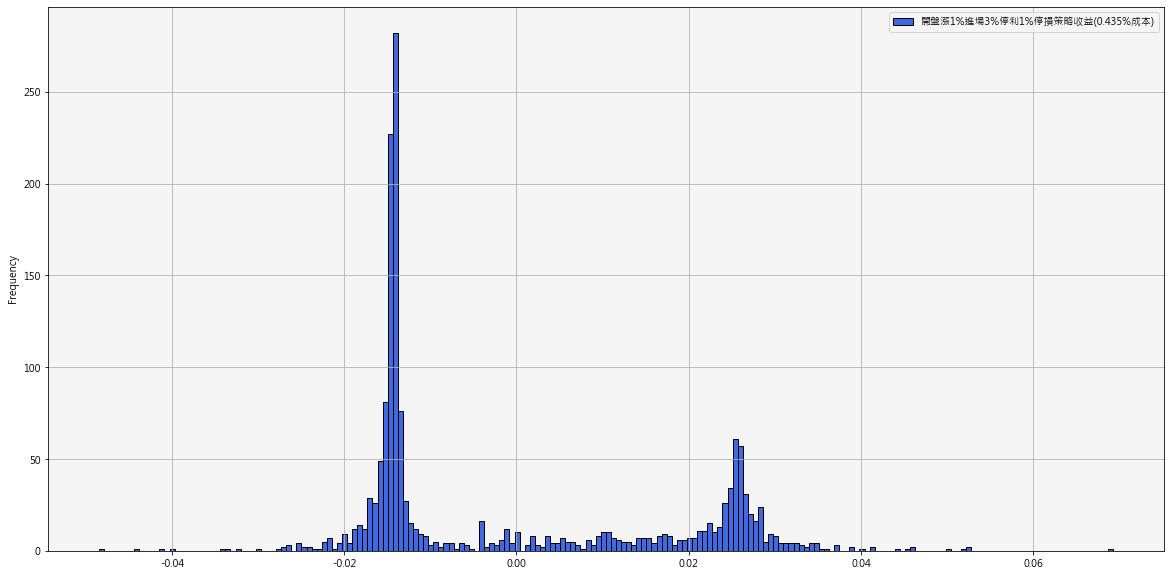

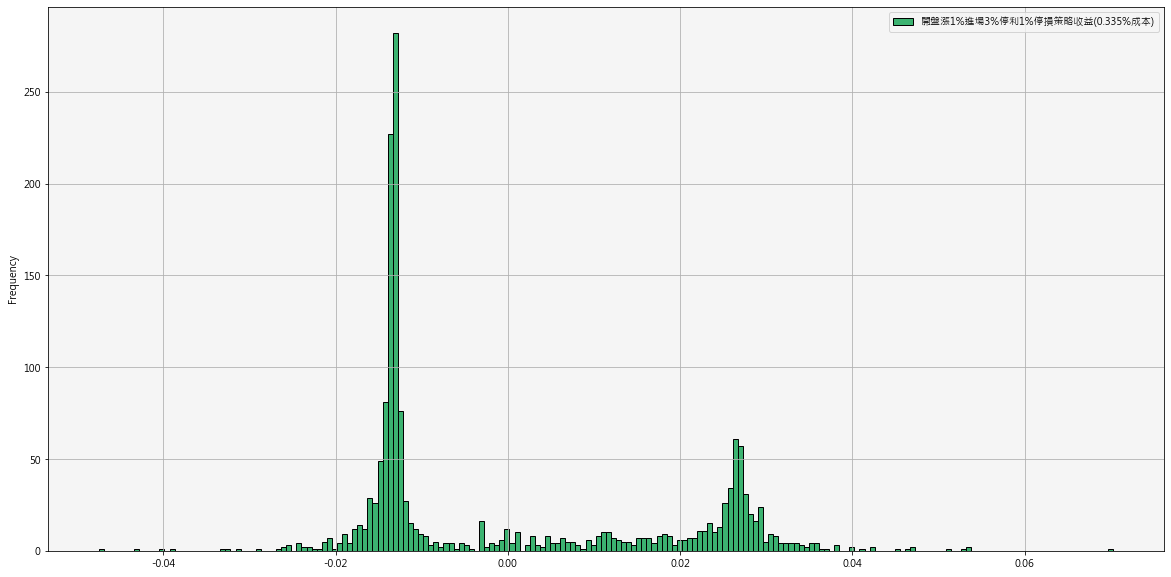

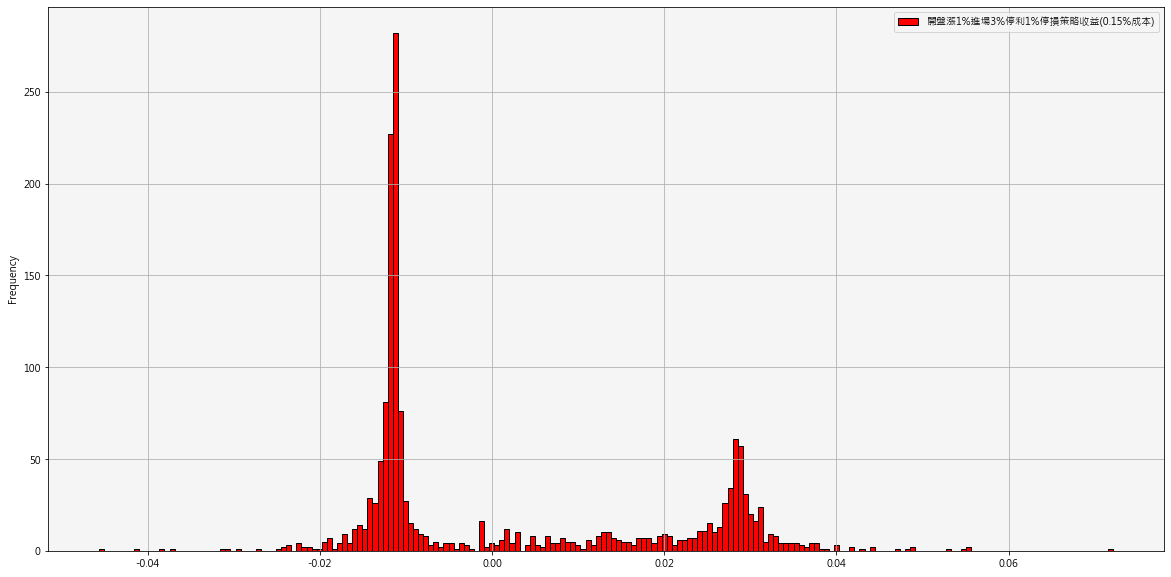

In [174]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場3%停利1%停損
############################################################################################
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [175]:
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,-0.000881,0.000119,0.001969
std,0.018626,0.018626,0.018626
min,-0.048536,-0.047536,-0.045686
25%,-0.014551,-0.013551,-0.011701
50%,-0.013702,-0.012702,-0.010852
75%,0.020798,0.021798,0.023648
max,0.069283,0.070283,0.072133


<AxesSubplot: ylabel='Frequency'>

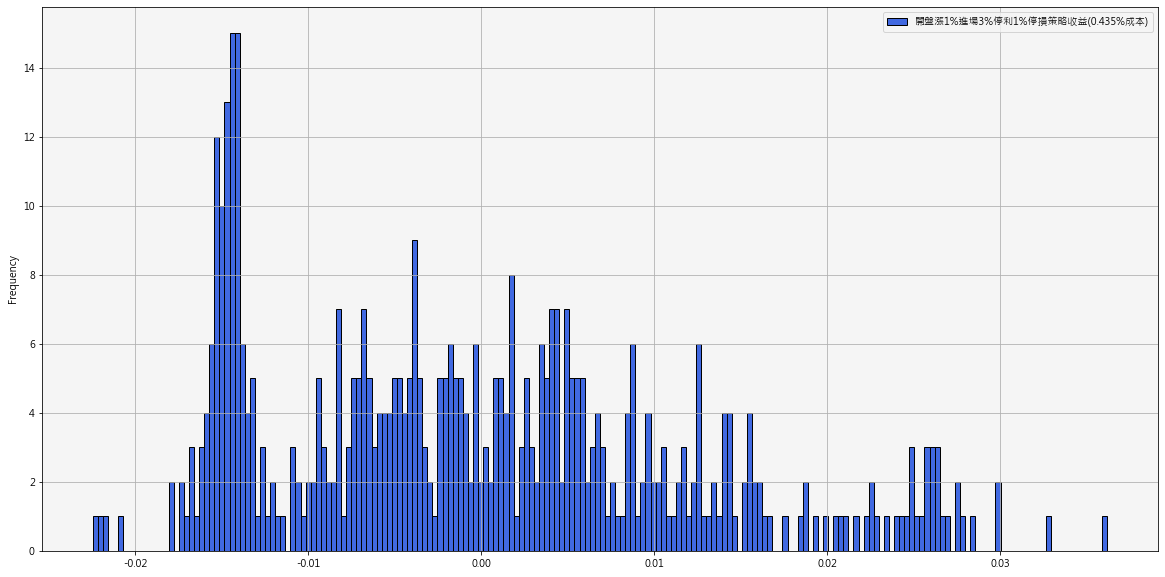

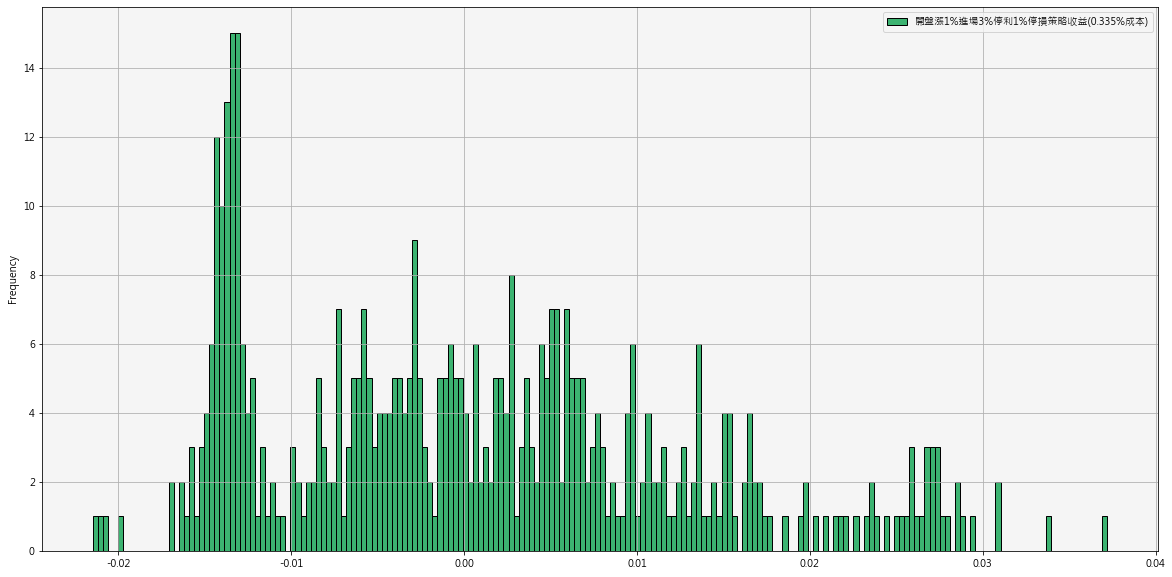

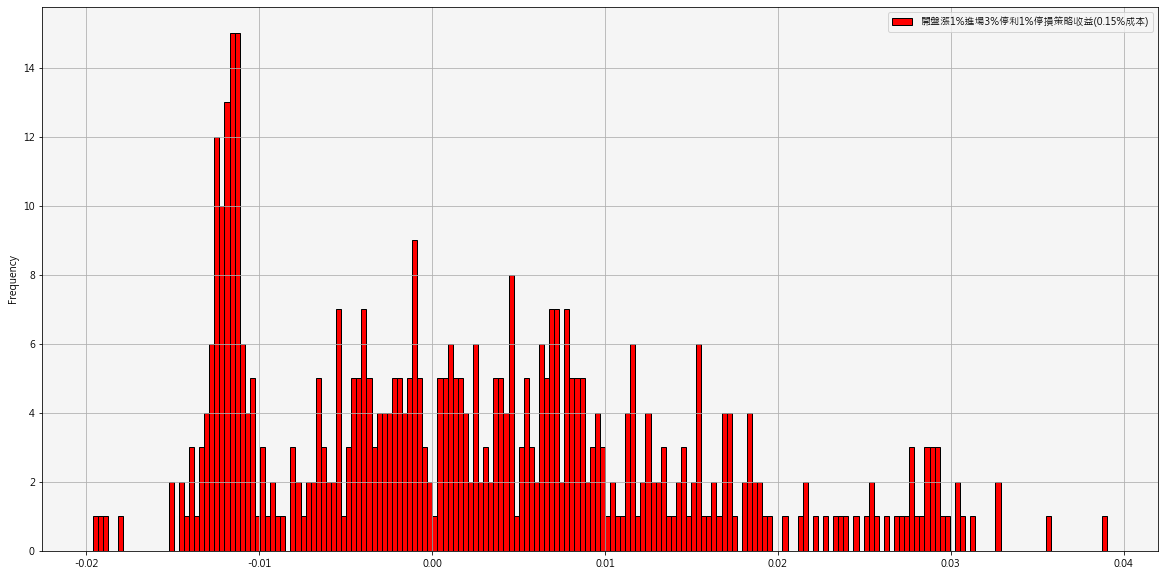

In [176]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [177]:
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,-0.000458,0.000542,0.002392
std,0.012035,0.012035,0.012035
min,-0.022481,-0.021481,-0.019631
25%,-0.010480,-0.009480,-0.007630
50%,-0.001663,-0.000663,0.001187
75%,0.006561,0.007561,0.009411
max,0.036190,0.037190,0.039040


<AxesSubplot: xlabel='日期'>

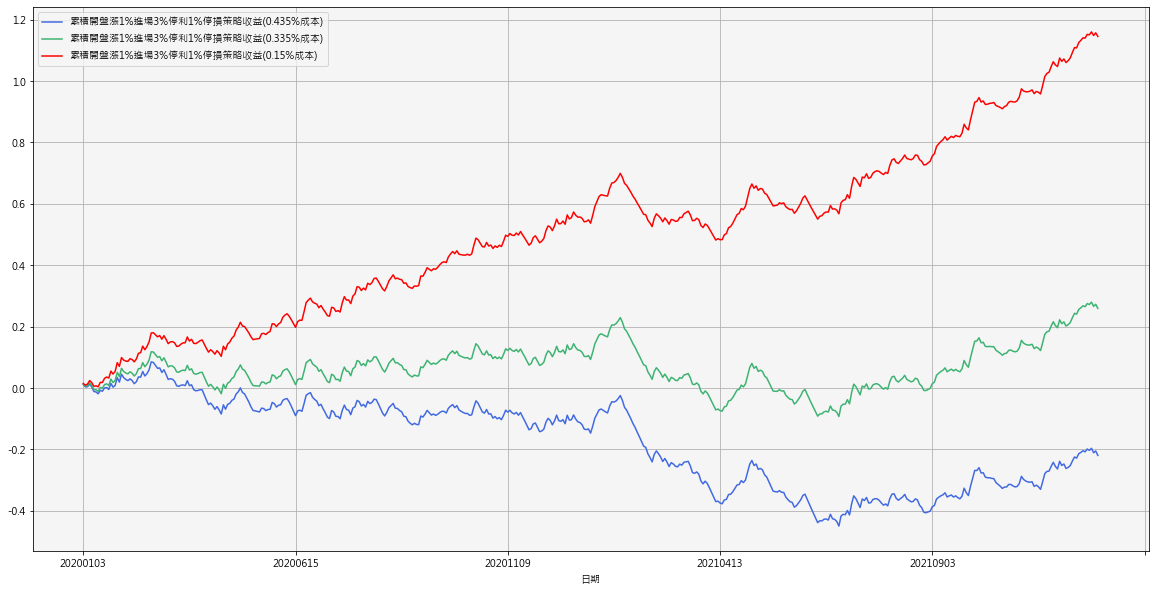

In [178]:
returns_day[['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=6>浮動檔數</font>**

**<font  size=5>每日股票池檔數</font>**

In [6]:
pool_long = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_多.csv',index_col= 0)
pool_short = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_空.csv',index_col= 0)

In [7]:
pd.DataFrame(pool_long.T.count()).rename(columns={0:'檔數'}).T

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,13,2,1,5,4,28,1,1,4,11,25,9,8,5,7,3,3,5,15,4,25,39,12,1,24,2,2,39,58,5,5,3,1,4,35,5,10,23,2,9,2,11,13,30,34,2,13,42,53,11,11,8,7,14,13,3,2,6,7,5,2,11,2,3,10,3,2,8,5,7,9,11,12,7,3,...,3,26,13,3,18,3,9,2,5,3,5,4,8,18,8,1,19,6,19,3,2,3,19,25,16,8,7,49,6,36,10,5,39,15,7,8,2,4,10,23,4,9,6,17,24,8,10,15,4,5,7,20,5,3,2,5,22,26,3,6,3,1,17,5,13,2,17,4,27,23,7,1,3,6,21


In [8]:
pd.DataFrame(pd.DataFrame(pool_long.T.count()).rename(columns={0:'檔數'}).mean()).rename(columns = {0:'多單'}).rename({'檔數':'每日平均股票池檔數'}).T

,每日平均股票池檔數
多單,9.680328


In [136]:
pd.DataFrame(pool_short.T.count()).rename(columns={0:'檔數'}).T

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,4,10,25,8,8,3,6,10,3,5,6,4,4,15,6,15,16,10,17,9,10,10,17,25,10,12,15,15,6,13,8,15,19,30,2,9,9,14,12,12,14,24,4,8,7,5,18,1,4,3,4,7,5,1,6,16,10,10,7,17,10,1,26,18,13,18,13,11,3,8,7,11,4,14,15,...,7,5,11,7,10,15,5,10,7,9,17,4,17,6,17,9,16,12,6,16,8,24,4,12,23,16,10,12,25,16,24,8,16,19,17,22,26,8,6,6,9,13,13,17,8,13,10,7,15,10,17,11,14,19,21,8,6,8,18,9,11,24,2,23,8,9,9,2,12,5,8,15,12,8,4


In [360]:
pd.DataFrame(pd.DataFrame(pool_short.T.count()).rename(columns={0:'檔數'}).mean()).rename(columns = {0:'空單'}).rename({'檔數':'每日平均股票池檔數'}).T

,每日平均股票池檔數
空單,13.354508


**<font  size=5>開盤漲1%進場(浮動檔數)(多空單皆不設限VIX)</font>**

**<font  size=4>9%停利3%停損</font>**

In [83]:
transactions_long = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤1%進場9%停利3%停損_多_215VIX.csv")
transactions_short = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤1%進場9%停利3%停損_空_215VIX.csv")


In [84]:
transactions_long.date = pd.to_datetime(transactions_long.date).dt.strftime("%Y%m%d")
transactions_short.date = pd.to_datetime(transactions_short.date).dt.strftime("%Y%m%d")
transactions =  pd.concat([transactions_long, transactions_short])
returns_long = transactions_long.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns_long['returns'] =returns_long['value']/transactions_long[transactions_long['value'] > 0].reset_index(drop = True)['value']
returns_short = transactions_short.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns_short['returns'] =returns_short['value']/transactions_short[transactions_short['value'] > 0].reset_index(drop = True)['value']
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']

In [85]:
returns_long['returns(加成本0.15%)'] = returns_long['returns']-0.0015
returns_long['returns(加成本0.335%)'] = returns_long['returns']-0.00335
returns_long['returns(加成本0.435%)'] = returns_long['returns']-0.00435
returns_short['returns(加成本0.15%)'] = returns_short['returns']-0.0015
returns_short['returns(加成本0.335%)'] = returns_short['returns']-0.00335
returns_short['returns(加成本0.435%)'] = returns_short['returns']-0.00435

In [86]:
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435
returns_long = returns_long.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns_long['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns_long['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns_long['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435
returns_short = returns_short.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns_short['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns_short['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns_short['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435

In [87]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_long_day = returns_long.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_short_day = returns_short.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})

**<font  size=4>多單發訊檔數</font>**

In [88]:
pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

日期,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200508,20200511,20200514,...,20210809,20210810,20210811,20210812,20210817,20210818,20210819,20210820,20210823,20210827,20210830,20210831,20210901,20210902,20210903,20210906,20210907,20210908,20210909,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210928,20210929,20210930,20211004,20211005,20211006,20211008,20211012,20211013,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211115,20211117,20211118,20211119,20211122,20211123,20211125,20211129,20211130,20211202,20211206,20211207,20211208,20211214,20211217,20211220,20211222,20211223,20211228,20211229
多單發訊檔數,1,1,5,2,6,1,1,2,4,4,2,5,4,4,2,3,4,2,3,4,4,3,1,4,2,2,4,4,1,5,3,4,5,3,3,3,1,5,2,5,5,5,4,5,5,5,5,2,2,2,5,1,2,3,2,2,3,2,1,4,1,3,3,3,2,5,3,2,2,3,5,1,2,2,4,...,2,2,2,3,2,2,2,1,2,2,3,1,1,2,1,2,2,2,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,1,2,1,1,1,2,2,2,2,1,2,2,1,2,2,3,1,2,1,2,1,1,1,2,2,2,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1


<AxesSubplot: xlabel='日期'>

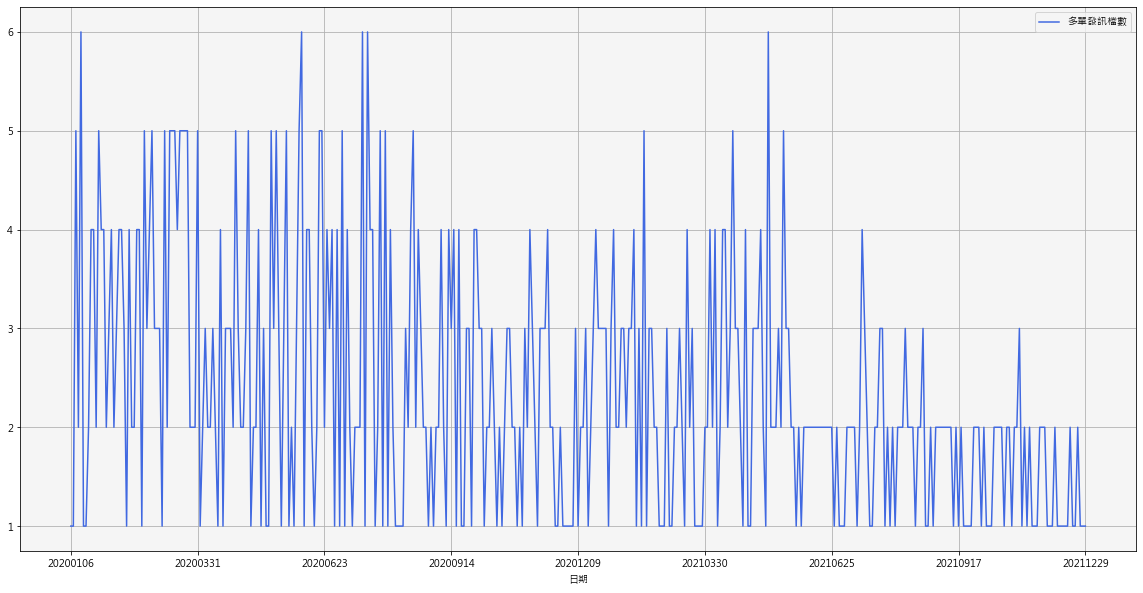

In [137]:
pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).plot(figsize=(20, 10),color = ['royalblue'],grid = True)

In [89]:
pd.DataFrame(pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).mean()).rename(columns = {0:'多單'}).rename({'多單發訊檔數':'每日平均發訊檔數'}).T

,每日平均發訊檔數
多單,2.354115


**<font  size=4>多單勝率</font>**

In [90]:
pd.concat([pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.15%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.335%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.435%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])


,多單勝率
勝率(加成本0.15%),0.409958
勝率(加成本0.335%),0.372881
勝率(加成本0.435%),0.354873


In [91]:
pd.concat([pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])

,多單每日平均勝率
勝率(加成本0.15%),0.396509
勝率(加成本0.335%),0.361596
勝率(加成本0.435%),0.351621


**<font  size=4>空單發訊檔數</font>**

In [93]:
pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

日期,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,...,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
多單發訊檔數,1,5,9,8,4,2,5,6,3,4,2,2,2,12,4,11,7,9,6,9,10,7,10,18,8,10,11,9,4,10,6,14,7,26,2,1,7,8,9,7,2,3,2,8,6,5,10,1,1,3,3,3,2,4,11,7,9,5,7,5,1,21,12,9,9,7,7,2,4,6,8,2,8,12,9,...,7,7,3,5,10,7,8,11,4,9,3,6,10,1,8,4,12,9,10,10,4,9,5,11,4,9,20,15,9,6,21,14,18,7,10,15,14,7,9,8,5,5,8,12,10,8,6,10,6,3,9,7,9,9,12,11,12,4,3,5,12,7,7,12,21,6,4,4,2,8,4,5,9,6,7


<AxesSubplot: xlabel='日期'>

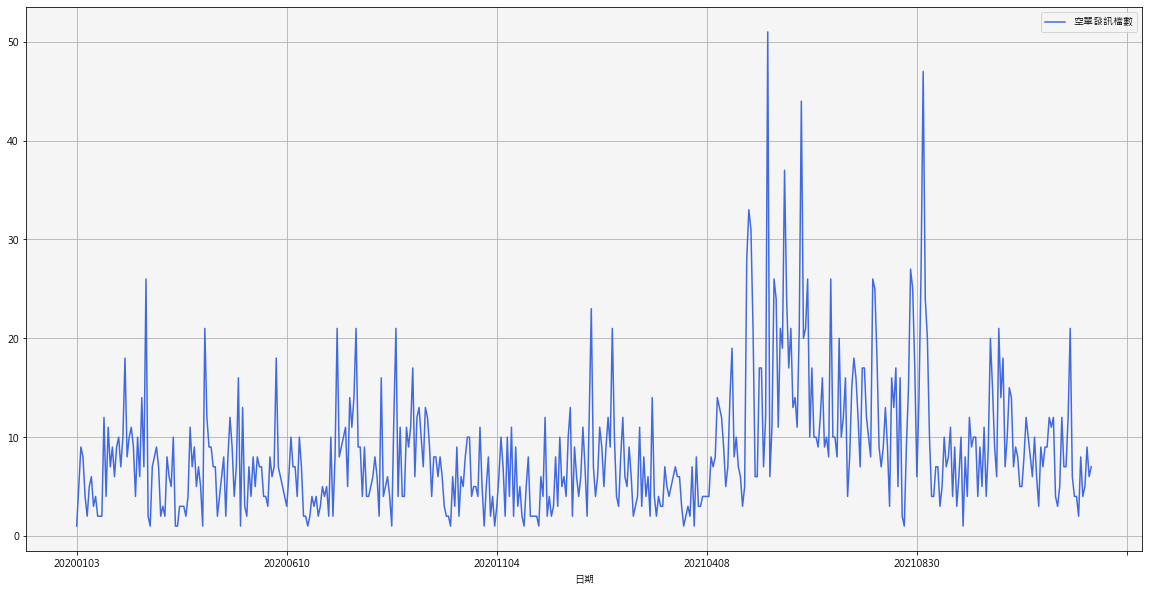

In [138]:
pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).plot(figsize=(20, 10),color = ['royalblue'],grid = True)

In [94]:
pd.DataFrame(pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).mean()).rename(columns = {0:'空單'}).rename({'空單發訊檔數':'每日平均發訊檔數'}).T

,每日平均發訊檔數
空單,8.590909


**<font  size=4>空單勝率</font>**

In [95]:
pd.concat([pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.15%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.335%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.435%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])


,空單勝率
勝率(加成本0.15%),0.578403
勝率(加成本0.335%),0.557239
勝率(加成本0.435%),0.542809


In [96]:
pd.concat([pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])

,空單每日平均勝率
勝率(加成本0.15%),0.632231
勝率(加成本0.335%),0.586777
勝率(加成本0.435%),0.559917


In [115]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

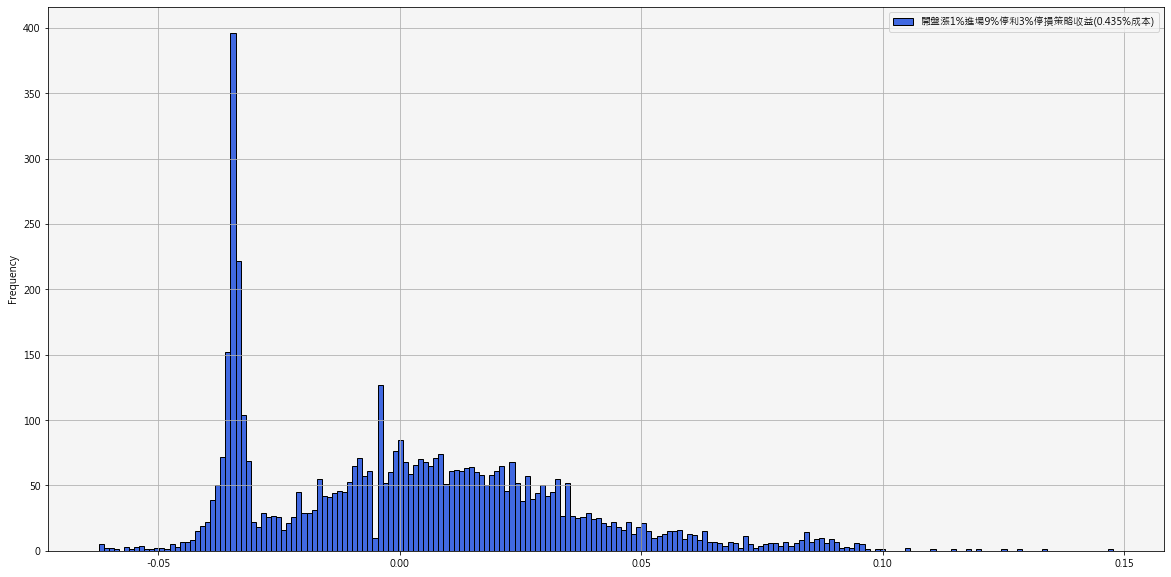

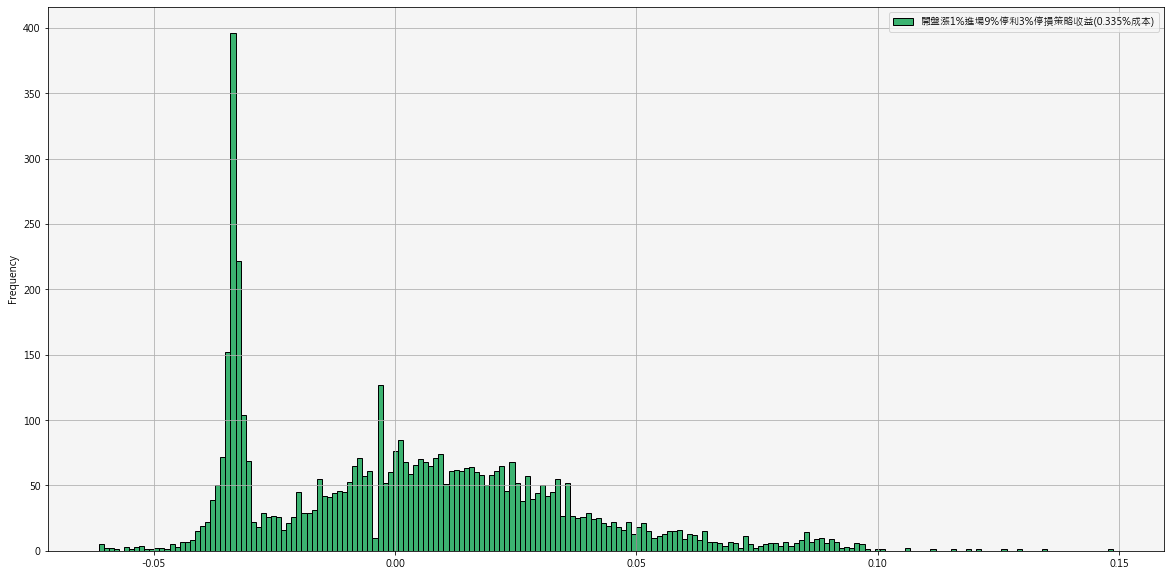

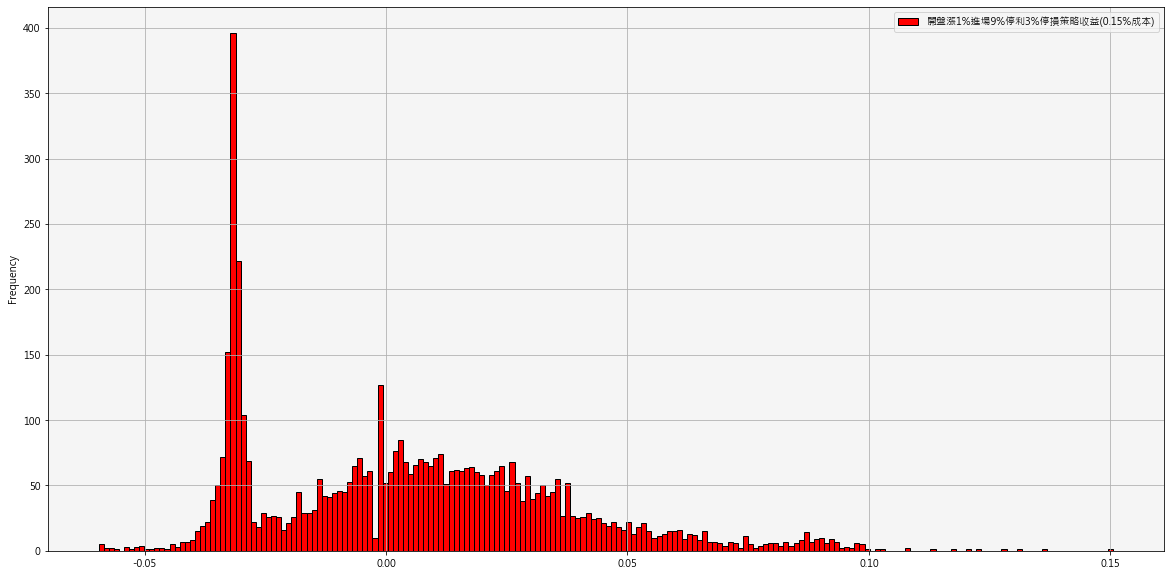

In [116]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [117]:
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.002218,0.003218,0.005068
std,0.031279,0.031279,0.031279
min,-0.062395,-0.061395,-0.059545
25%,-0.028139,-0.027139,-0.025289
50%,0.000615,0.001615,0.003465
75%,0.022030,0.023030,0.024880
max,0.147729,0.148729,0.150579


<AxesSubplot: ylabel='Frequency'>

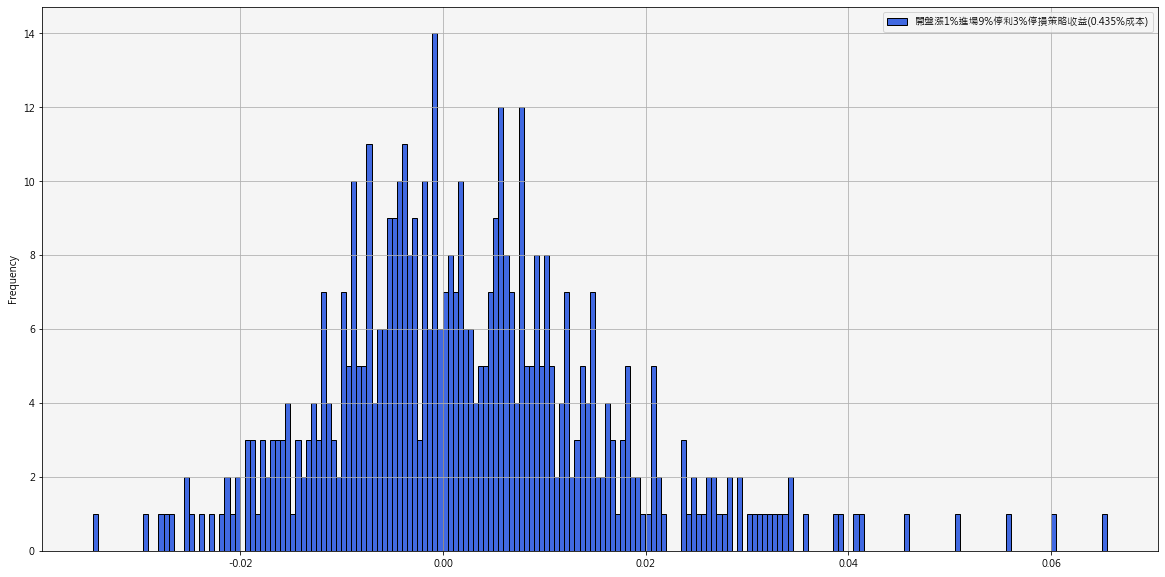

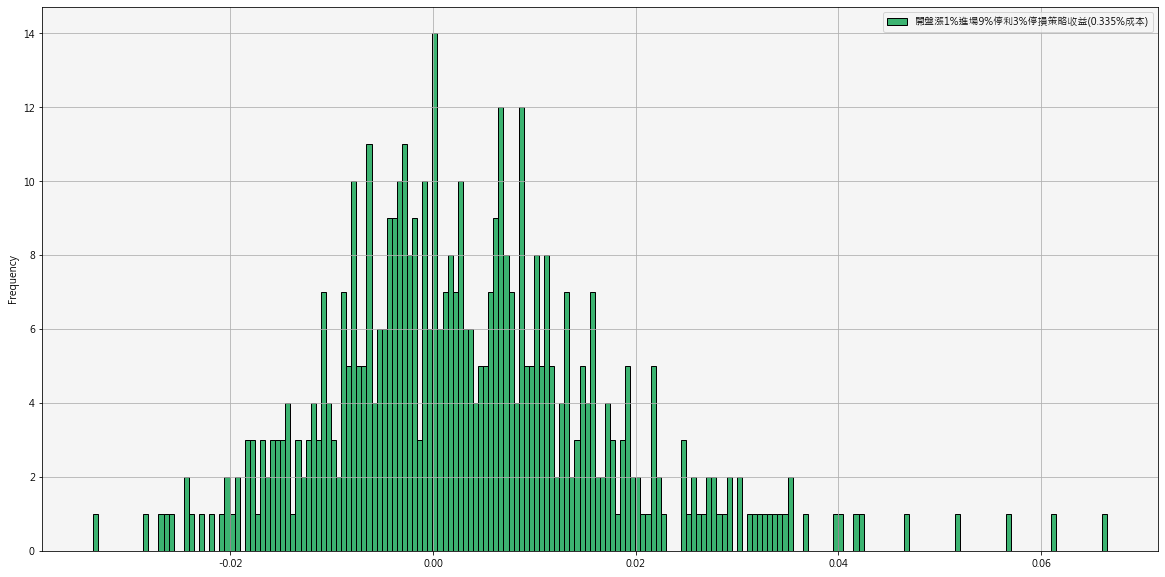

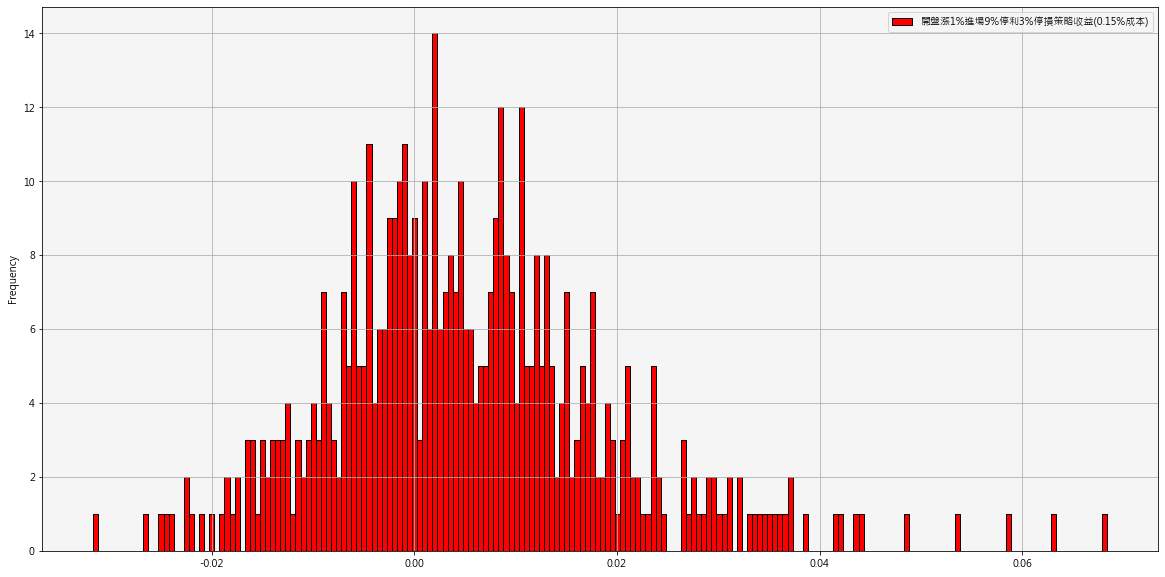

In [118]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [119]:
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.002479,0.003479,0.005329
std,0.013906,0.013906,0.013906
min,-0.034595,-0.033595,-0.031745
25%,-0.006387,-0.005387,-0.003537
50%,0.000991,0.001991,0.003841
75%,0.009518,0.010518,0.012368
max,0.065526,0.066526,0.068376


<AxesSubplot: xlabel='日期'>

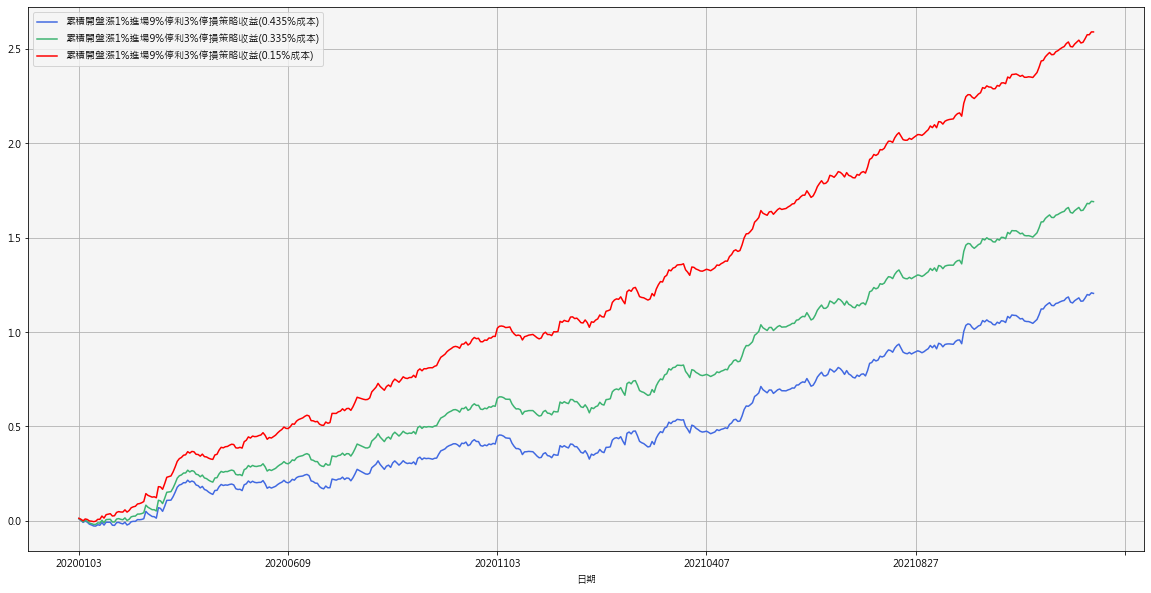

In [120]:
returns_day[['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=4>各年度收益統計</font>**

In [266]:
import pyfolio as pf
import empyrical as ep
from pyfolio.deprecate import deprecated
from pyfolio.interesting_periods import PERIODS
from pyfolio.txn import get_turnover
from pyfolio.utils import APPROX_BDAYS_PER_MONTH, APPROX_BDAYS_PER_YEAR
from pyfolio.utils import DAILY
import scipy.stats as stats
returns_day.index = pd.to_datetime(returns_day.index)

def value_at_risk(returns, period=None, sigma=2.0):
  
    if period is not None:
        returns_agg = ep.aggregate_returns(returns, period)
    else:
        returns_agg = returns.copy()

    value_at_risk = returns_agg.mean() - sigma * returns_agg.std()
    return value_at_risk


SIMPLE_STAT_FUNCS = [
    ep.annual_return,
    ep.cum_returns_final,
    ep.annual_volatility,
    ep.sharpe_ratio,
    ep.calmar_ratio,
    ep.stability_of_timeseries,
    ep.max_drawdown,
    ep.omega_ratio,
    ep.sortino_ratio,
    stats.skew,
    stats.kurtosis,
    ep.tail_ratio,
    value_at_risk
]
STAT_FUNC_NAMES = {
    'annual_return': '年化收益',
    'cum_returns_final': '累積收益',
    'annual_volatility': '年化波動度',
    'sharpe_ratio': '夏普比率',
    'calmar_ratio': 'Calmar 比率',
    'stability_of_timeseries': '穩定度',
    'max_drawdown': '最大回撤',
    'omega_ratio': 'Omega 比率',
    'sortino_ratio': 'Sortino 比率',
    'skew': '偏度',
    'kurtosis': '峰度',
    'tail_ratio': '尾部比率',
    'common_sense_ratio': 'Common sense 比率',
    'value_at_risk': 'Daily value at risk',
    'alpha': 'Alpha',
    'beta': 'Beta',
}

In [269]:
df_stats = pd.DataFrame()
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index <='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index <='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index <='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = stats
df_stats = df_stats.T
df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
df_stats_2020 = df_stats.T
df_stats_2020.columns = [['2020年','2020年','2020年'],list(df_stats_2020.columns)]

In [270]:
df_stats = pd.DataFrame()
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index >='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index >='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day[returns_day.index >='20210101']['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = stats
df_stats = df_stats.T
df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
df_stats_2021 = df_stats.T
df_stats_2021.columns = [['2021年','2021年','2021年'],list(df_stats_2021.columns)]

In [271]:
df_stats = pd.DataFrame()
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = stats
stats = pd.Series()
for stat_func in SIMPLE_STAT_FUNCS:
    stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'])
df_stats['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = stats
df_stats = df_stats.T
df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
df_stats_all = df_stats.T
df_stats_all.columns = [['All','All','All'],list(df_stats_all.columns)]
df_stats_ed = pd.concat([df_stats_2020,df_stats_2021,df_stats_all],axis = 1)

In [273]:
df_stats_ed

2020年  \
                    開盤漲1%進場9%停利3%停損策略收益(0.435%成本)   
年化收益                                      44.01 %   
累積收益                                      42.14 %   
年化波動度                                     20.41 %   
夏普比率                                     1.888565   
Calmar 比率                                3.829842   
穩定度                                      0.875514   
最大回撤                                     -11.49 %   
Omega 比率                                 1.384132   
Sortino 比率                               3.432147   
偏度                                       0.976324   
峰度                                       2.187622   
尾部比率                                     1.468202   
Daily value at risk                       -2.42 %   

                                                   \
                    開盤漲1%進場9%停利3%停損策略收益(0.335%成本)   
年化收益                                      85.19 %   
累積收益                                      81.16 %   
年化波動度                                     20.41 %   
夏普比率                                     3.123096   
Calmar 比率                                8.708583   
穩定度                                       0.94581   
最大回撤                                      -9.78 %   
Omega 比率                                 1.724024   
Sortino 比率                               6.153152   
偏度                                       0.976324   
峰度                                       2.187622   
尾部比率                                     1.630737   
Daily value at risk                       -2.32 %   

                                                  \
                    開盤漲1%進場9%停利3%停損策略收益(0.15%成本)   
年化收益                                    194.73 %   
累積收益                                    183.57 %   
年化波動度                                    20.41 %   
夏普比率                                    5.406978   
Calmar 比率                              26.988679   
穩定度                                     0.980025   
最大回撤                                     -7.22 %   
Omega 比率                                2.615826   
Sortino 比率                             12.457163   
偏度                                      0.976324   
峰度                                      2.187622   
尾部比率                                    1.995688   
Daily value at risk                      -2.13 %   

                                            2021年  \
                    開盤漲1%進場9%停利3%停損策略收益(0.435%成本)   
年化收益                                     130.56 %   
累積收益                                     123.79 %   
年化波動度                                     23.57 %   
夏普比率                                     3.666979   
Calmar 比率                               15.992164   
穩定度                                      0.979878   
最大回撤                                      -8.16 %   
Omega 比率                                 1.844059   
Sortino 比率                               6.947805   
偏度                                       0.617586   
峰度                                        1.42479   
尾部比率                                     1.504923   
Daily value at risk                       -2.63 %   

                                                   \
                    開盤漲1%進場9%停利3%停損策略收益(0.335%成本)   
年化收益                                     196.37 %   
累積收益                                     185.09 %   
年化波動度                                     23.57 %   
夏普比率                                     4.736334   
Calmar 比率                               25.824393   
穩定度                                      0.987751   
最大回撤                                       -7.6 %   
Omega 比率                                 2.215367   
Sortino 比率                               9.596112   
偏度                                       0.617586   
峰度                                        1.42479   
尾部比率                                     1.640776   
Daily value at risk                       -2.53 %   

                                                  \
                    開盤漲1%進場